<a href="https://colab.research.google.com/github/AlexandraBushueva/my-projects/blob/main/%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82_5_%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B1%D0%B8%D0%B7%D0%BD%D0%B5%D1%81_%D0%BF%D0%BE%D0%BA%D0%B0%D0%B7%D0%B0%D1%82%D0%B5%D0%BB%D0%B5%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Анализ бизнес-показателей

**Описание проекта**

Анализируется развлекательное приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки.

**Цель**: разобраться в причинах и помочь компании выйти в плюс.

**Что необходимо изучить?**
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

**Какие данные есть?**

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о заказах, а costs_info_short.csv — информацию о расходах на рекламу.

*Структура visits_info_short.csv:*
- User Id — уникальный идентификатор пользователя,
- Region — страна пользователя,
- Device — тип устройства пользователя,
- Channel — идентификатор источника перехода,
- Session Start — дата и время начала сессии,
- Session End — дата и время окончания сессии.

*Структура orders_info_short.csv:*
- User Id — уникальный идентификатор пользователя,
- Event Dt — дата и время покупки,
- Revenue — сумма заказа.

*Структура costs_info_short.csv:*
- dt — дата проведения рекламной кампании,
- Channel — идентификатор рекламного источника,
- costs — расходы на эту кампанию.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
✅ Хорошо, есть вступление. Оно обязательно должно быть в работе.

### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [ ]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta


In [ ]:
# Импортируем датасеты
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
⚠️ Библиотеки желательно импортировать в отдельной ячейке, чтобы не приходилось, в случае добавления новой библиотеки, загружать еще датасет, что может занять дополнительное время, если объем данных огромный.

In [ ]:
# Изучаем визуально данные по каждому датасету
visits.head(10)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05


In [ ]:
orders.head(10)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
5,129100331057,2019-05-01 01:56:28,4.99
6,626807144131,2019-05-01 02:39:21,4.99
7,914062168985,2019-05-01 02:02:18,4.99
8,769669137453,2019-05-01 03:39:47,4.99
9,434198630691,2019-05-01 18:16:50,5.99


In [ ]:
costs.head(10)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
5,2019-05-06,FaceBoom,118.8
6,2019-05-07,FaceBoom,101.2
7,2019-05-08,FaceBoom,100.1
8,2019-05-09,FaceBoom,93.5
9,2019-05-10,FaceBoom,104.5


Во всех датасетах необходимо привести названия столбцов к нижнему регистру и единому стилю

In [ ]:
# Приводим наименования столбцов к нижнему регистру
visits.columns = map(str.lower, visits.columns)

In [ ]:
orders.columns = map(str.lower, orders.columns)

In [ ]:
costs.columns = map(str.lower, costs.columns)

In [ ]:
# Меняем наименования столбцов
visits.rename(columns = {'user id' : 'user_id'}, inplace = True)
visits.rename(columns = {'session start' : 'session_start'}, inplace = True)
visits.rename(columns = {'session end' : 'session_end'}, inplace = True)

orders.rename(columns = {'user id' : 'user_id'}, inplace = True)
orders.rename(columns = {'event dt' : 'event_dt'}, inplace = True)

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
✅ Переименовать колонки еще можно следующим образом, чтобы вручную всё не прописывать:
    
    visits.columns = [x.lower().replace(' ', '_') for x in visits.columns.values]

In [ ]:
# Проверяем типы данных, изменения наименования столбцов, пропуски
visits.info()
orders.info()
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   

Пропусков в данных нет, кол-во полей соответсвует друг другу в каждом датасете.

Столбцы, в которых нужно изменить тип данных:
- visits: в столбцах Session Start, Session End необходимо заменить тип данных: object → datetime.
- orders: в столбце Event Dt: object → datetime.
- costs: в столбце dt: object → datetime.


In [ ]:
#Меняем тип данных на datetime
visits['session_start'] = pd.to_datetime(visits['session_start'], format='%Y-%m-%dT%H:%M:%S')
visits['session_end'] = pd.to_datetime(visits['session_end'], format='%Y-%m-%dT%H:%M:%S')
orders['event_dt'] = pd.to_datetime(orders['event_dt'] , format='%Y-%m-%dT%H:%M:%S')
costs['dt'] = pd.to_datetime(costs['dt'] , format='%Y-%m-%dT%H:%M:%S')

# Проверяем типы данных после изменения
visits.info()
orders.info()
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.

Типы данных корректны

In [ ]:
# Проверим датасеты на дубликаты
print(visits.duplicated().sum())
print(orders.duplicated().sum())
print(costs.duplicated().sum())

0
0
0


<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
⚠️ Я бы советовал использовать функцию и/или цикл (или list comprehension) для вывода информации обо всех загруженных таблицах (метод `info()`, проверка дубликатов и пр.). Это упрощает работу. И в дальнейшем в следующих проектах можно переиспользовать, чтобы не тратить время на код с нуля.
    
Заголовки добавить можно таким образом:
    
    print('\033[1m' + 'Наличие дубликатов в таблице:' + '\033[0m')


Дубликатов в данных нет.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
✅ Хорошо, пропуски и дубликаты проверены, соответствующие типы данных изменены, названия колонок переименованы соответствующим образом.

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

**Функция для создания профилей пользователей**

In [ ]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


In [ ]:
# функция для построения графика конверсии
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(30, 10))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()#bbox_to_anchor=(1.0, 1.05), loc='upper left')
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

**Функция для расчёта LTV и ROI**

In [ ]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC,
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

**Функция расчета конверсии**

In [ ]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

**Функция расчета удержания**

In [ ]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

**Функции для построения графиков:**
- filter_data() — для сглаживания данных,
- plot_retention() — для построения графика Retention Rate,
- plot_conversion() — для построения графика конверсии,
- plot_ltv_roi — для визуализации LTV и ROI.


In [ ]:
# функция для сглаживания данных
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean()
    return df

In [ ]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей'.format(
            horizon
        )
    )

    plt.tight_layout()
    plt.show()

In [ ]:
# функция для визуализации LTV и ROI
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(30, 15))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV', fontsize=25)

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon), fontsize=25)

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей', fontsize=25)


    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI', fontsize=25)

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon), fontsize=25)

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

1. Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
2. Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
3. Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
4. Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

In [ ]:
# 3.1 Определим минимальную и максимальную даты привлечения пользователей
profiles = get_profiles(visits, orders, costs)
min_analysis_date = profiles['dt'].min()
observation_date = profiles['dt'].max()

In [ ]:
print(min_analysis_date)
print(observation_date)

2019-05-01 00:00:00
2019-10-27 00:00:00


Минимальная дата привлечения пользователей - 01.05.2019, максимальная дата - 27.10.2019, что соответствует изначальному условию

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"></h2>
    
❌ На самом деле, здесь нужно определить даты привлечения в таблице с профилями пользователей (это не таблица costs) и не нужно отнимать дни. В функции уже учтен горизонт анализа.

В описании проекта написано: "Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года". Стоит дописать, соответствуют ли результаты описанию.

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Исправлено  

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"></h2>
    
❌ `observation_date = profiles['dt'].max()` - касательно момента анализа в описании есть следующее: "Считайте, что на календаре 1 ноября 2019 года". Момент анализа не совпадает с максимальной датой. Нужно исправить. Даты определены верно. Но observation_date указан неверно

In [ ]:
# выведем данные профилей пользователей, которые подробнее рассмотрим в следующих шагах
profiles = get_profiles(visits, orders, costs)
profiles.head(10)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
5,34186288,2019-05-09 17:29:23,organic,Android,United States,2019-05-09,2019-05-01,False,0.000000
6,38448301,2019-08-16 11:56:00,organic,Android,United States,2019-08-16,2019-08-01,False,0.000000
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-01,True,1.008000
8,58263264,2019-05-11 19:18:43,FaceBoom,iPhone,United States,2019-05-11,2019-05-01,False,1.128205
9,59835779,2019-05-11 21:13:47,MediaTornado,iPhone,United States,2019-05-11,2019-05-01,False,0.250435


In [ ]:
# 3.2. Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей.
profiles.groupby('region').agg({'user_id': 'nunique', 'payer': ['sum', 'mean']})

user_id payer          
              nunique   sum      mean
region                               
France          17450   663  0.037994
Germany         14981   616  0.041119
UK              17575   700  0.039829
United States  100002  6902  0.069019

Пользователи в приложение приходят из 4-х стран: Франция, Германия, Великобритания, США.
Больше всего пользователей приходится на США, примерно 7% из них являются платящими. Меньше всего платящих пользователей во Франции и Великобритании, около 4%.

In [ ]:
# 3.3. Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи.
devices = profiles.groupby('device').agg({'user_id': 'nunique', 'payer': 'sum'})
devices['ratio'] = round(devices['payer'] / devices['user_id'], 3)
devices.rename(columns = {'user_id':'user_total', 'payer':'payer_total'}, inplace = True )
devices

,user_total,payer_total,ratio
device,,,
Android,35032,2050,0.059
Mac,30042,1912,0.064
PC,30455,1537,0.050
iPhone,54479,3382,0.062


Клиенты для приложения используют android, mac, pc, iPhone. Платящие пользователи предпочитают mac, на втором месте iPhone.

In [ ]:
# 3.4. Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей
channels = profiles.groupby('channel').agg({'user_id': 'nunique', 'payer': 'sum'})
channels['ratio'] = round(channels['payer']/channels['user_id'],3)
channels.rename(columns = {'user_id':'user_total', 'payer':'payer_total'}, inplace = True )
channels.sort_values('ratio', ascending = False)

,user_total,payer_total,ratio
channel,,,
FaceBoom,29144,3557,0.122
AdNonSense,3880,440,0.113
lambdaMediaAds,2149,225,0.105
TipTop,19561,1878,0.096
RocketSuperAds,4448,352,0.079
WahooNetBanner,8553,453,0.053
YRabbit,4312,165,0.038
MediaTornado,4364,156,0.036
LeapBob,8553,262,0.031


Больше всего пользователей пришли органически, т.е. сами. Каналы с наиболее высокими показателями привлчения клиентов: FaceBoom, TipTop. Наибольшая доля платящих пользователей приходится на каналы: FaceBoom и AdNonSense.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
✅ Хорошо, таблицы созданы, доли платящих пользователей рассчитаны, результаты прокомментированы. Но что можно сделать лучше:
    
* создать функцию для выведения трех таблиц, т.к. код во многом повторяется

В качестве альтернативы можно использовать `style.format()` для округления значений в колонке с долей платящих пользователей.

### Маркетинг

1. Посчитайте общую сумму расходов на маркетинг.
2. Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
3. Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.
4. Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

In [ ]:
# 4.1. Расчет общей суммы расходов на маркетинг

round(costs['costs'].sum(), 1)

105497.3

Общая сумма расходов на маркетинг составила - 105 497,3.

In [ ]:
# 4.2. Распределение общей суммы расходов на маркетинг в разрезе рекламных источников

costs.groupby('channel').agg({'costs': 'sum'}).sort_values(by='costs', ascending=False)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


Наиболее расходными каналами в маркетинге являются каналы: TipTop, FaceBoom, WahooNetBanner.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
✅ В лидерах TipTop и FaceBoom. В таблицу можно добавить еще колонку с долей суммарных расходов по источникам, чтобы сравнить в относительных величинах.

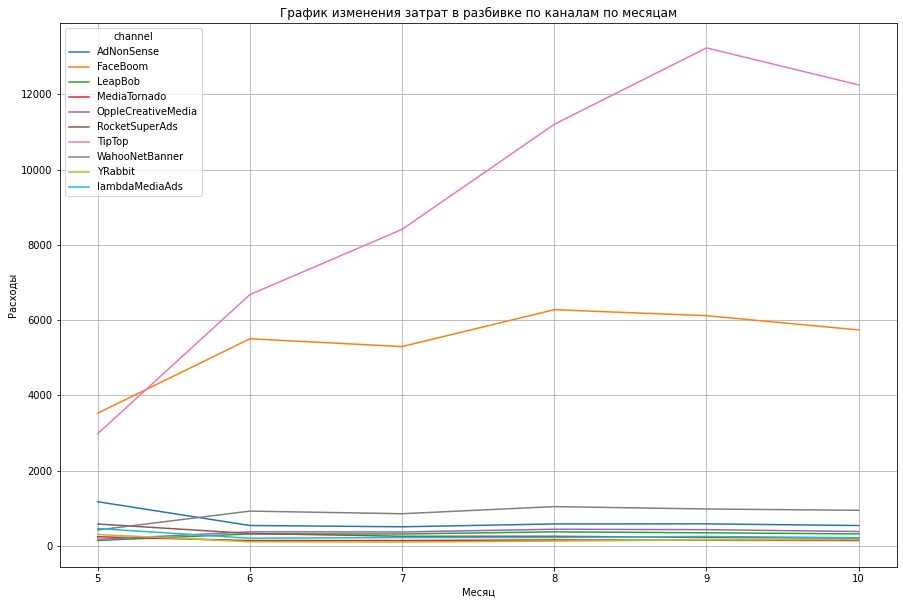

In [ ]:
# 4.3. Построим график с визуализацией динамики изменения расходов во времени по каждому источнику

#Создадим столбец с номером месяца и номером недели
costs['dt'] = pd.to_datetime(costs['dt'])
costs['month'] = costs['dt'].dt.month
costs['week'] = costs['dt'].dt.isocalendar().week

# Визуализация помесячно
costs.pivot_table(
    index='month',  # даты
    columns='channel',  # источники переходов
    values='costs',
    aggfunc='sum',
).plot(figsize=(15, 10), grid=True)

plt.title('График изменения затрат в разбивке по каналам по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Расходы')
plt.show()

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"></h2>
    
❌ Ниже есть визуализация по неделям. Но еще в задании требуется построить по месяцам

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Исправлено  

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"> </h2>
    
✅ +

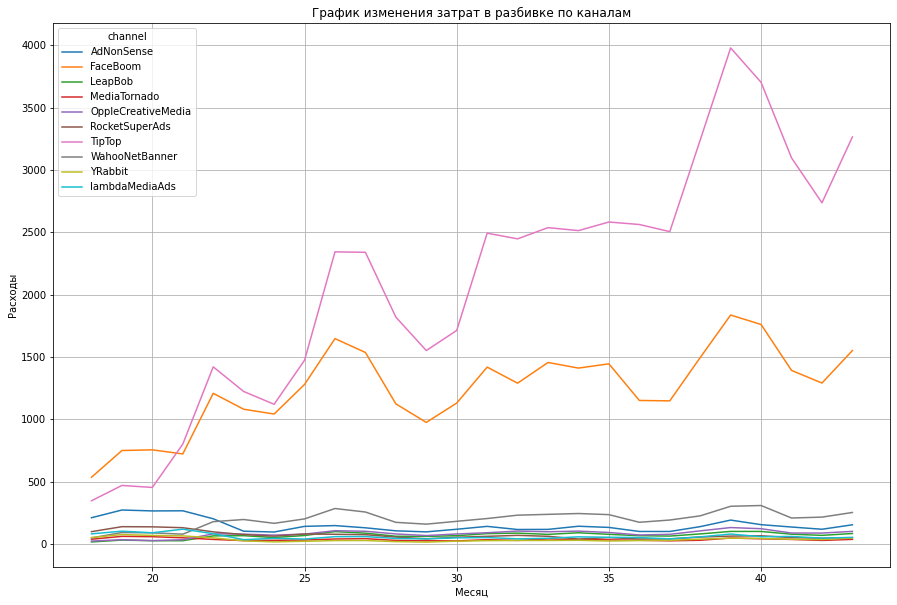

In [ ]:
# Визуализация понедельно
costs.pivot_table(
    index='week',  # даты
    columns='channel',  # источники переходов
    values='costs',
    aggfunc='sum',
).plot(figsize=(15, 10), grid=True)

plt.title('График изменения затрат в разбивке по каналам')
plt.xlabel('Месяц')
plt.ylabel('Расходы')
plt.show()

По графикам видим, что основные затраты на маркетинг приходятся на каналы TipTop, FaceBoom и в динамике имеют тенденцию к росту. Посмотрим изменение затрат на каналы без TipTop, FaceBoom.

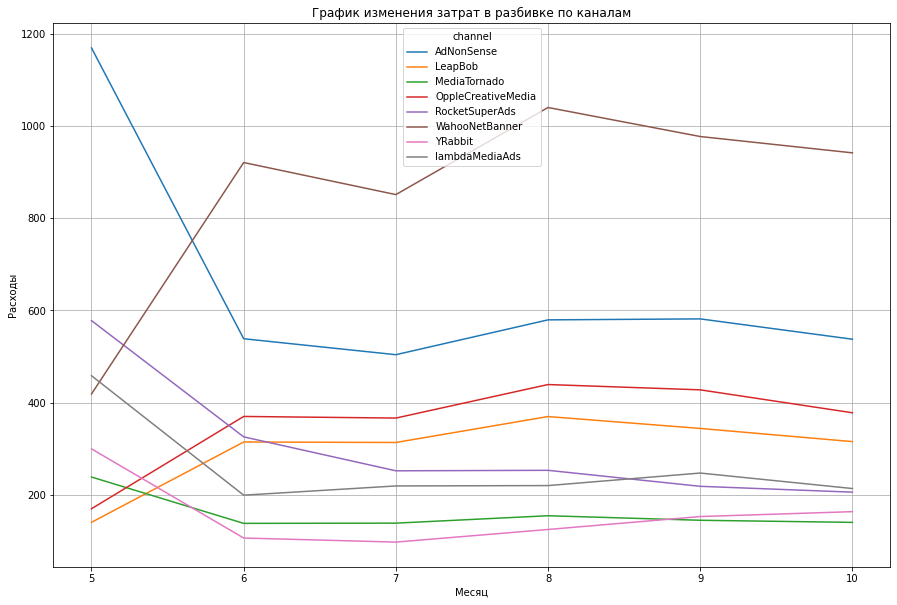

In [ ]:
bot_costs = costs.query('channel != "FaceBoom" & channel != "TipTop"')
bot_costs.pivot_table(
    index='month',  # даты
    columns='channel',  # источники переходов
    values='costs',
    aggfunc='sum',
).plot(figsize=(15, 10), grid=True)

plt.title('График изменения затрат в разбивке по каналам')
plt.xlabel('Месяц')
plt.ylabel('Расходы')
plt.show()

Видим, что значительных изменений затрат на каналы в динамике не происходило, кроме канала WahooNetBanner, который занимает третье место по объему затрат после TipTop, FaceBoom

In [ ]:
# 4.4. Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника

#Посмотрим на CAC для каждого источника трафика.

cac_by_channel = pd.DataFrame()
# уберём органических пользователей:
profiles = profiles.query('channel != "organic"')
cac_by_channel['acquisition_cost_mean'] = profiles.groupby('channel')['acquisition_cost'].mean()
cac_by_channel.sort_values(by='acquisition_cost_mean', ascending=False).style.format({'acquisition_cost_mean': '{:.2f}'})

,acquisition_cost_mean
channel,
TipTop,2.80
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.72
WahooNetBanner,0.60
RocketSuperAds,0.41
OppleCreativeMedia,0.25
YRabbit,0.22
MediaTornado,0.22


Самыми дорогими канлами привлечения являются TipTop, FaceBoom, AdNonSense

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
✅ По CAC TipTop выделяется на общем фоне.
  

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

1. Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
2. Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
3. Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
4. Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
5. Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
6. Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

In [ ]:
# 5.1. Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

# исключение органических пользователей из таблицы
profiles = profiles.query('channel != "organic"')

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
✅ Правильно. В данном разделе мы оцениваем окупаемость рекламы. На органических пользователей мы не тратим средства. Они приходят в продукт сами (например, по рекомендации друзей). С "органиками" результаты искажаются.

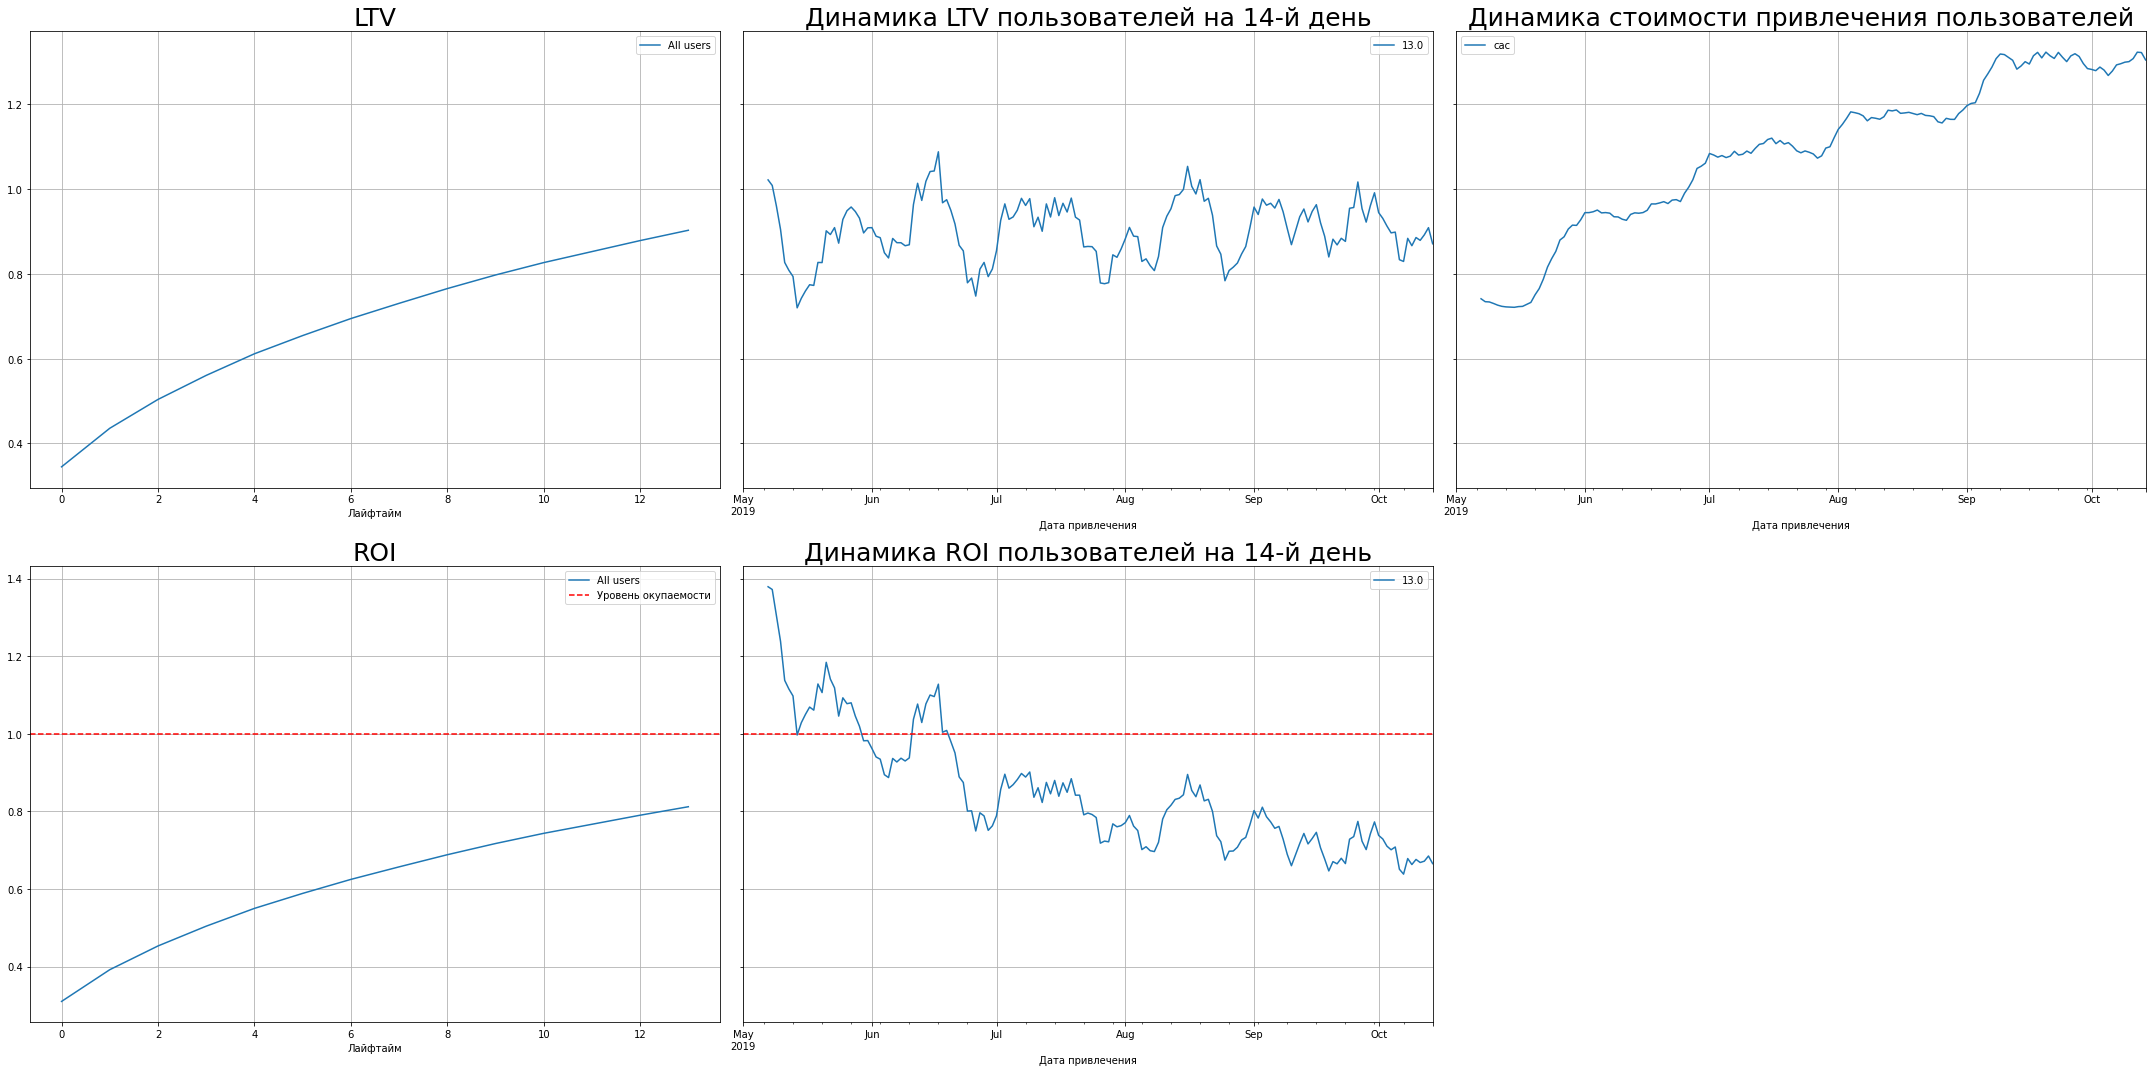

In [ ]:
# считаем LTV и ROI
#горизонт анализа - 2 недели (14 дней)
horizon_days = 14
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Из полученных графиков можем сделать следующие выводы:
- LTV пользователей имеет стабильную положительную динамику. Стабильная положительная динамика LTV говорит о том, что компания успешно удерживает клиентов, увеличивает их лояльность или увеличивает прибыль от каждого клиента, что в целом благоприятно для бизнеса.
- ROI находится на уровне ниже окупаемости. Инвестиция не приносит достаточного дохода или прибыли, чтобы компенсировать затраты на проект.
- ROI пользователей на 14-й день в динамике снижается. Падение ROI может означать, что с течением времени эффективность инвестиций в привлечение и удержание пользователей снижается.
- САС пользователей в динамкие постоянно растет. Стоимость привлечения одного клиента становится дороже

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
✅ На графике явно видим, что реклама не окупается (ROI ниже единицы).
     
LTV в компаниях, как правило, постоянно растет. Если бы мы увидели падение, это бы означало, скорее всего, наличие ошибки в расчетах. Но на графике LTV стабилен.
  

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"></h2>
    
❌ Но что можно сказать про CAC?

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Добавила  

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"> </h2>
    
✅ Стоимость привлечения пользователей (CAC) со временем увеличивалась; она окупалась только в мае-июне.

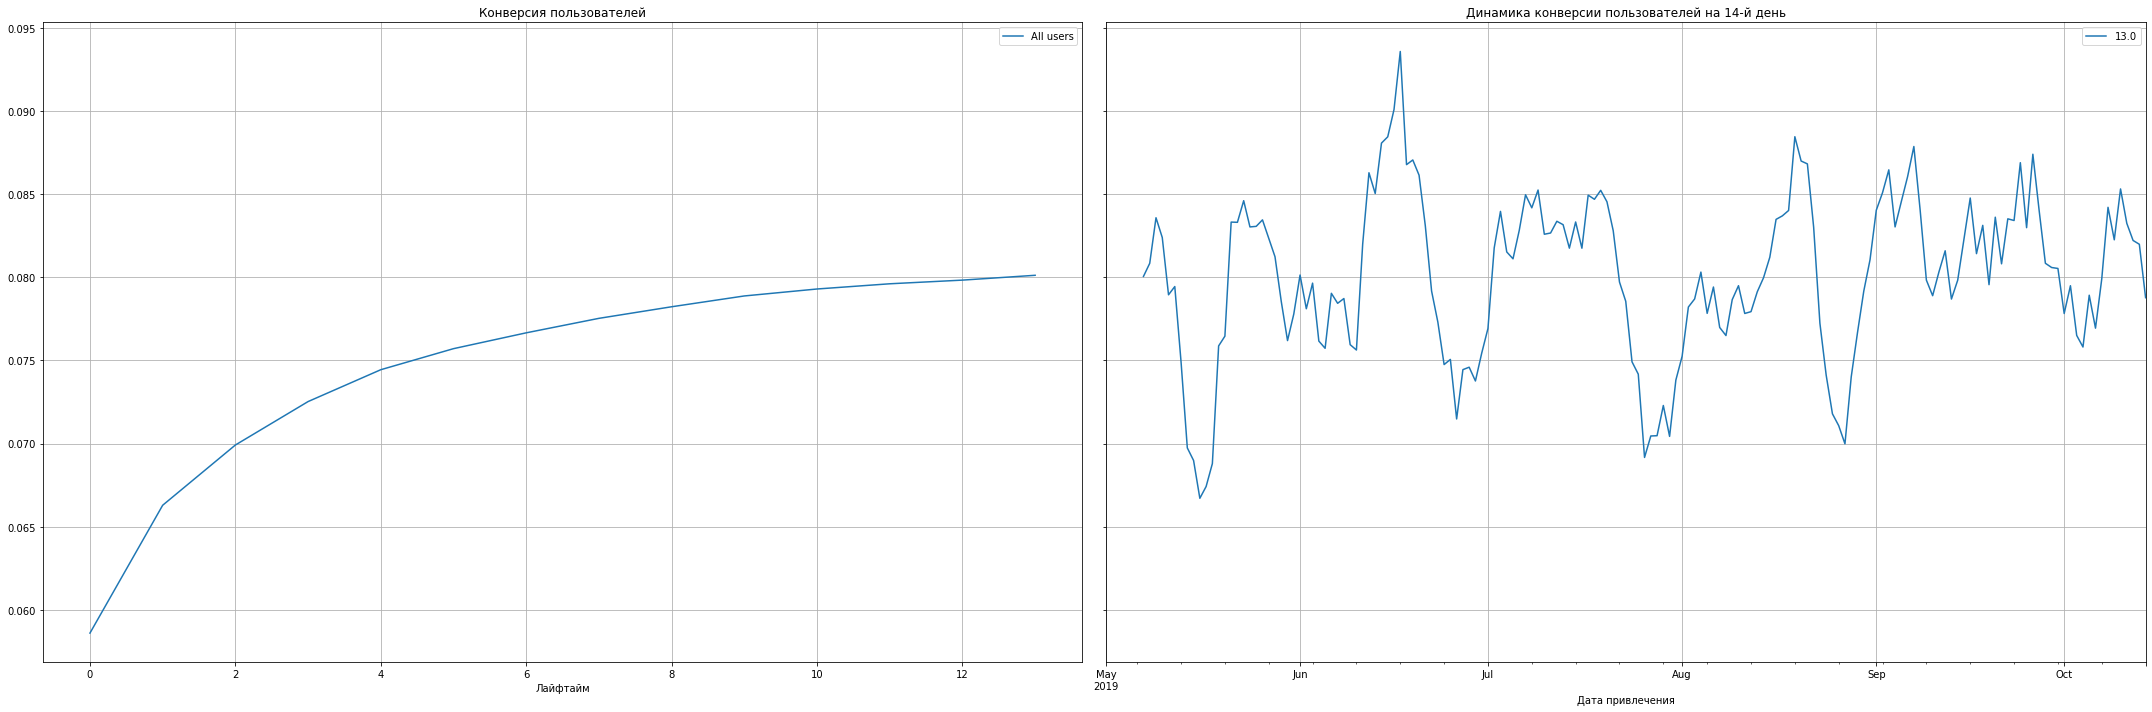

In [ ]:
# 5.2. Проверим конверсию пользователей и динамику её изменения.
# То же самое сделаем с удержанием пользователей. Построим и изучим графики конверсии и удержания.

# конверсия
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)


Конверсия пользователей растет, что является положительной динамикой для бизнеса

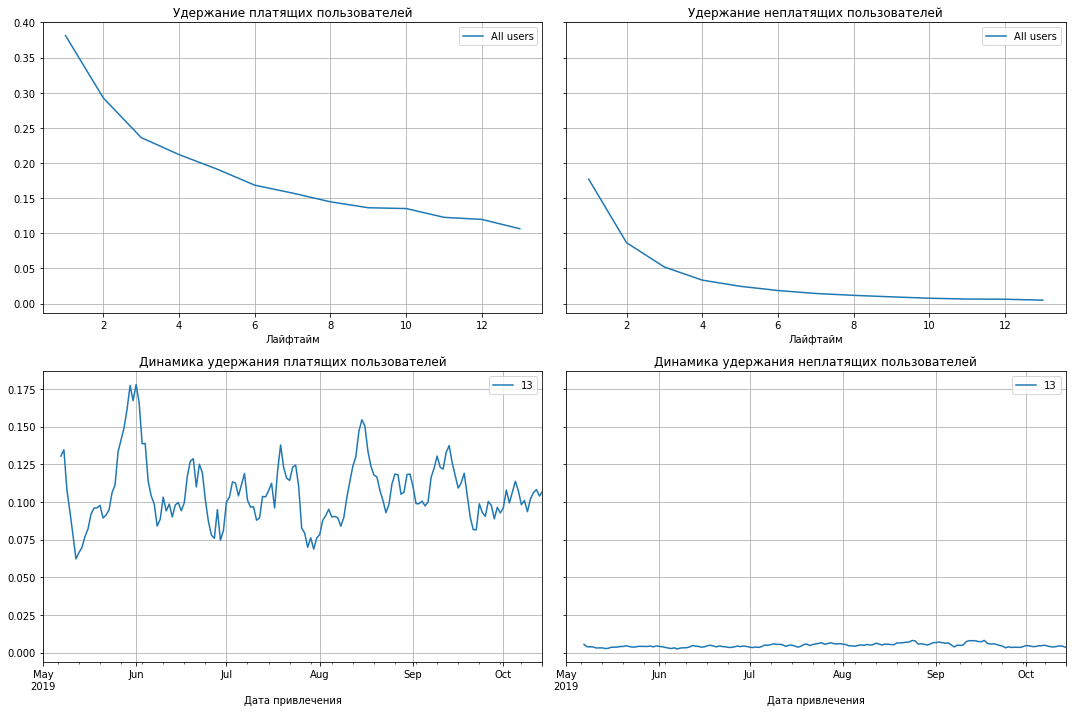

In [ ]:
# удержание
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days)

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
⚠️ Не хватает графиков удержания неплатящих пользователей. По удержанию неплатящих пользователей можно было бы еще добавить, с какого дня оно выходит на плато.

В удержании платящих пользователей негативная динамика на снижение

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"></h2>
    
❌ Также необходимо проанализировать конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам. Это важно, т.к. там мы можем найти ценную информацию.

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Добавила ниже

**Конверсия в разрезах по каналам, странам, устройствам**

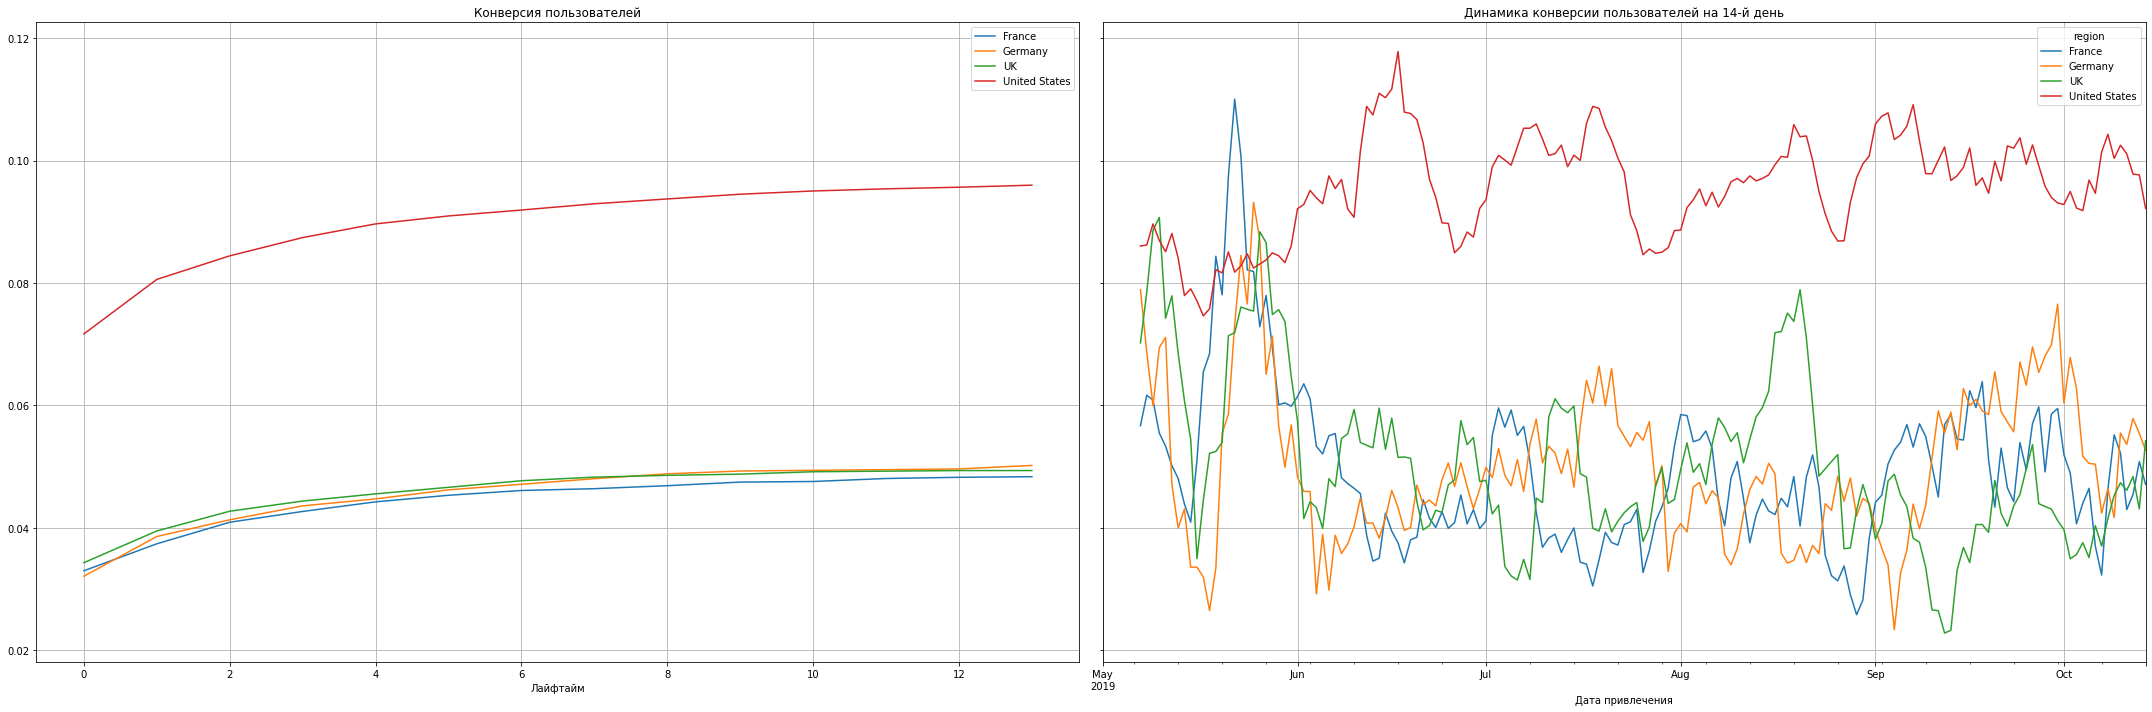

In [ ]:
dimensions = ['region']
# конверсия с разбивкой по странам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Наиболее высокая конверсия у пользоватлей из США. В остальных странах конверсия находится примерно на одном уровне.
В динамике конверсия по всем странам имеет тенденцию к росту.

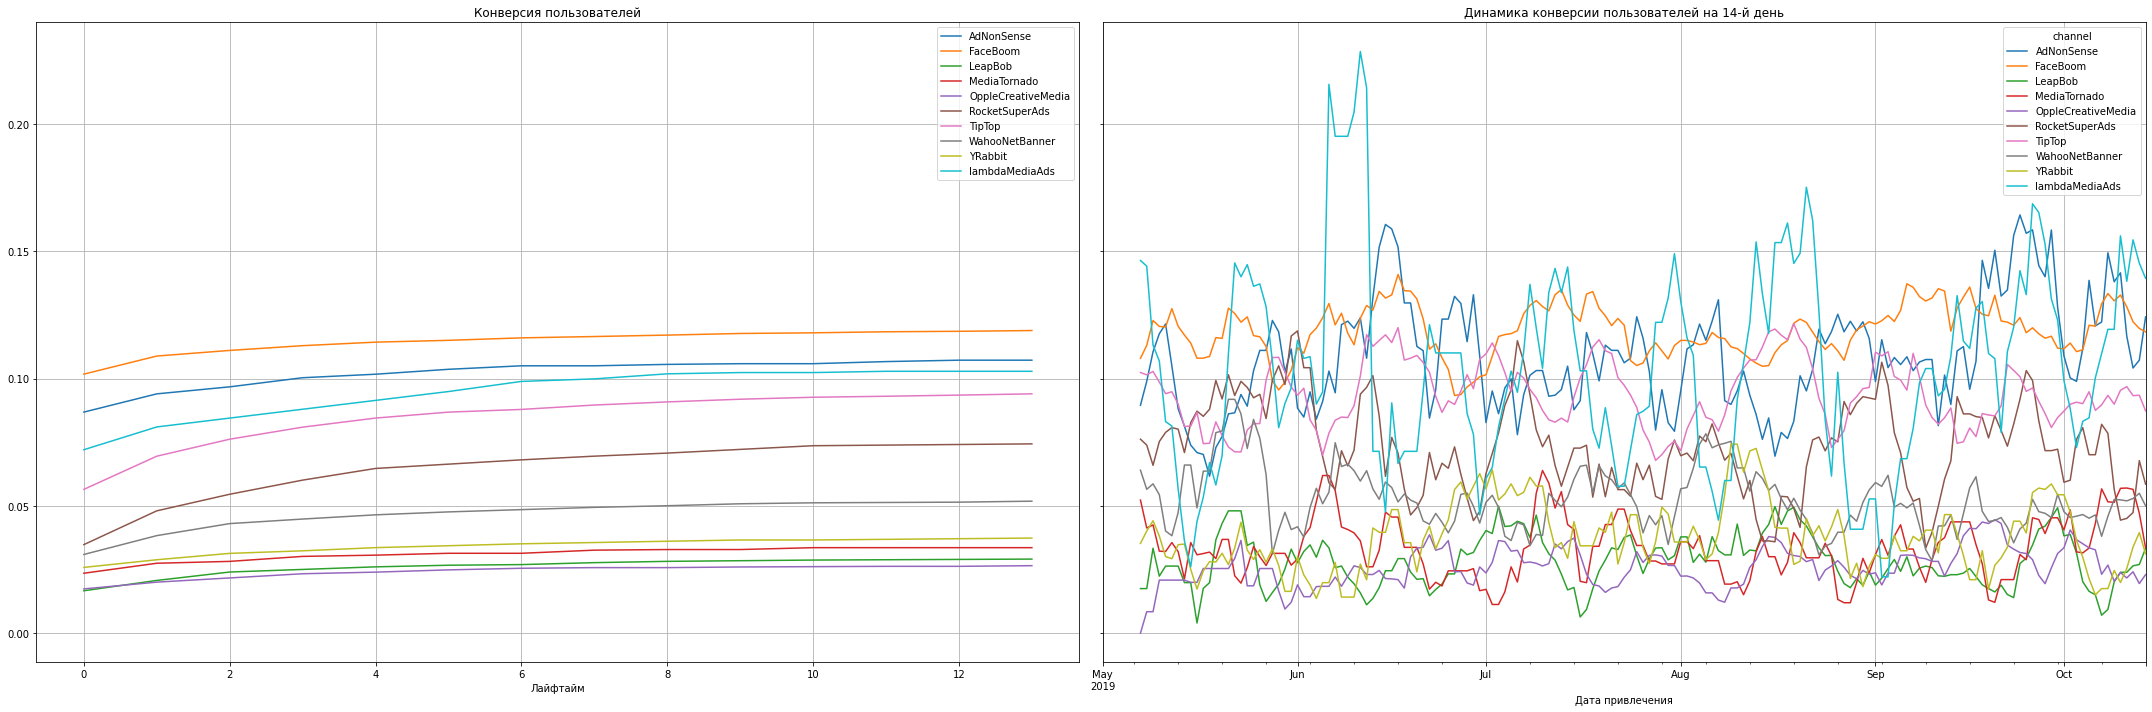

In [ ]:
dimensions = ['channel']
# конверсияю с разбивкой по каналам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

В рейтинге конверсий по каналам лидируют: FaceBoom, AdNonSense, lambdaMediaAds. По каналу lambdaMediaAds динамика конверсии пользователей на 14 день имеет скачкообразный характер

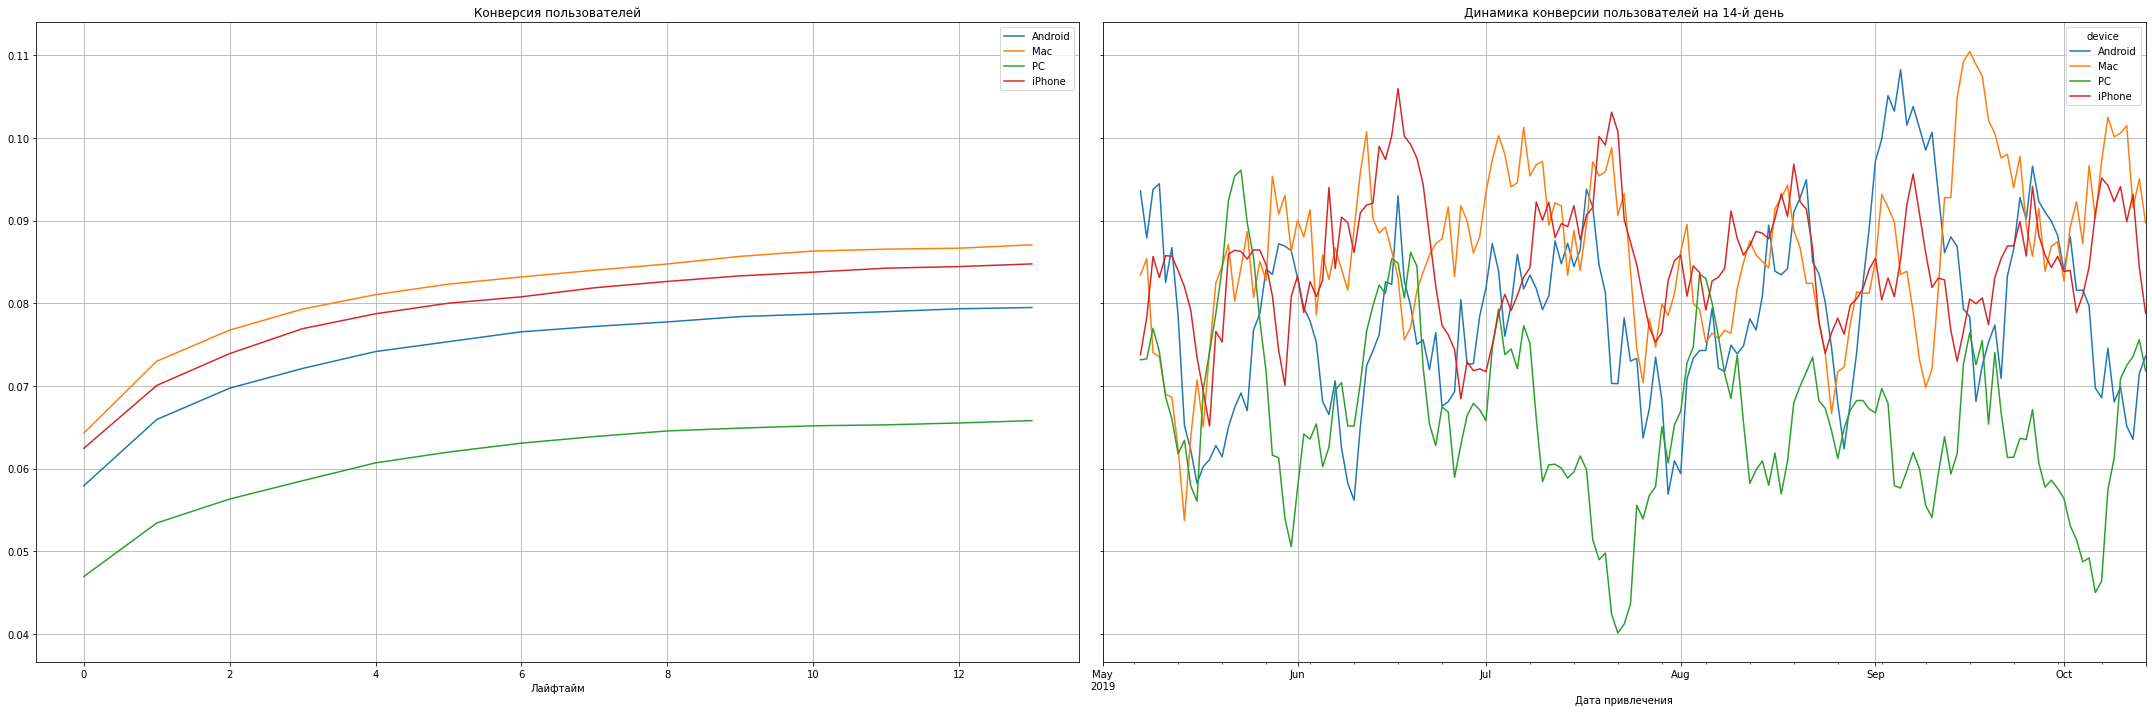

In [ ]:
dimensions = ['device']
# конверсия с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Конверсия выше всего у пользователей на MAC, iPhone. Ниже всего конверсия на PC. Самая нестабильная конверсия на 14 день у пользователей PC

**Удержание в разрезах по каналам, странам, устройствам**

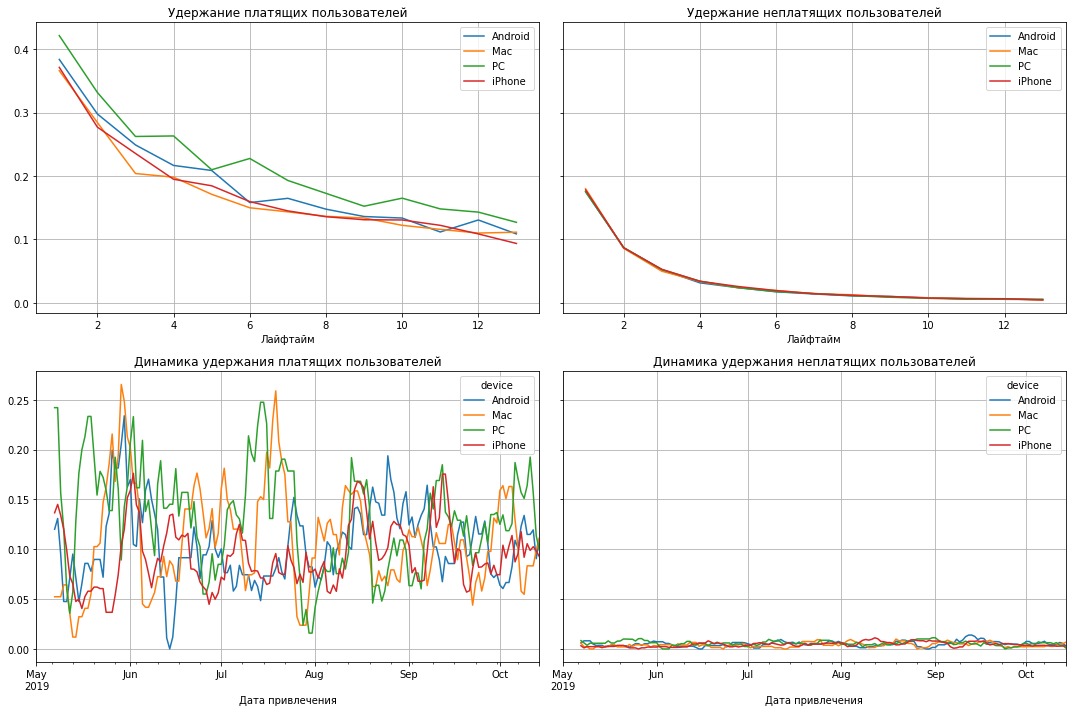

In [ ]:
# удержание с разбивкой по устройствам
dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Удержание платящих пользователей выше удержания неплатящих на всех устройствах, но общая тенденция в динамике имеет сходство на снижение.
На PC и Android уровень удержания немного выше, чем на остальных устройствах.

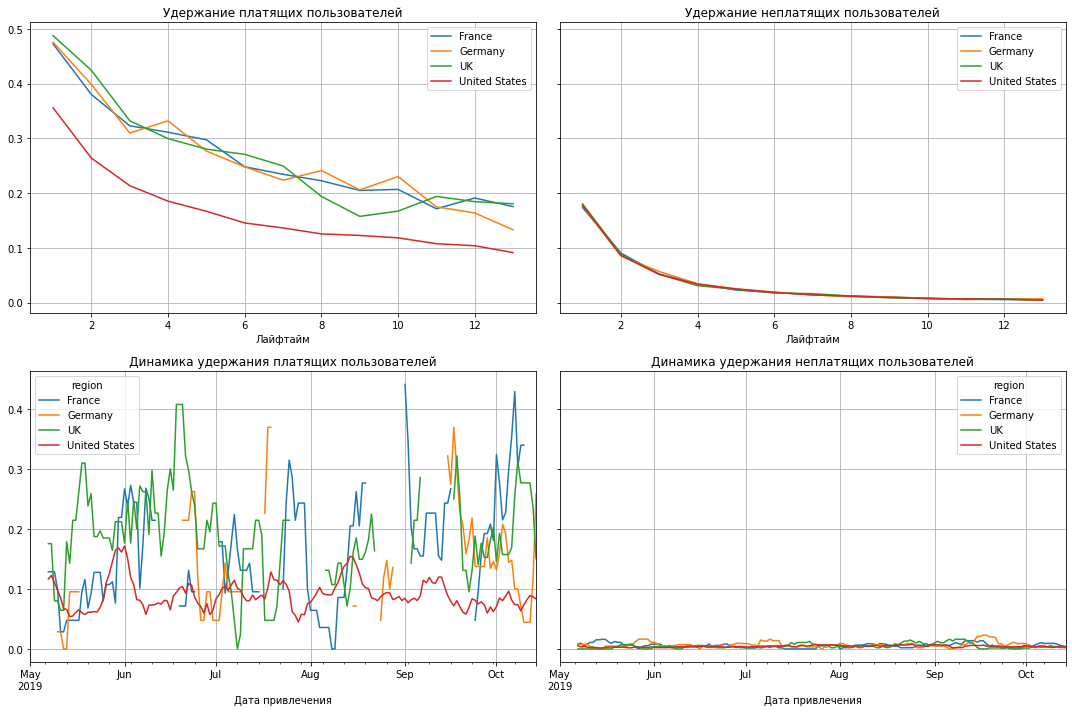

In [ ]:
# удержание с разбивкой по странам
dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Удержание платящих пользователей ниже всего в США, в остальных странах находится примерно на одном уровне.

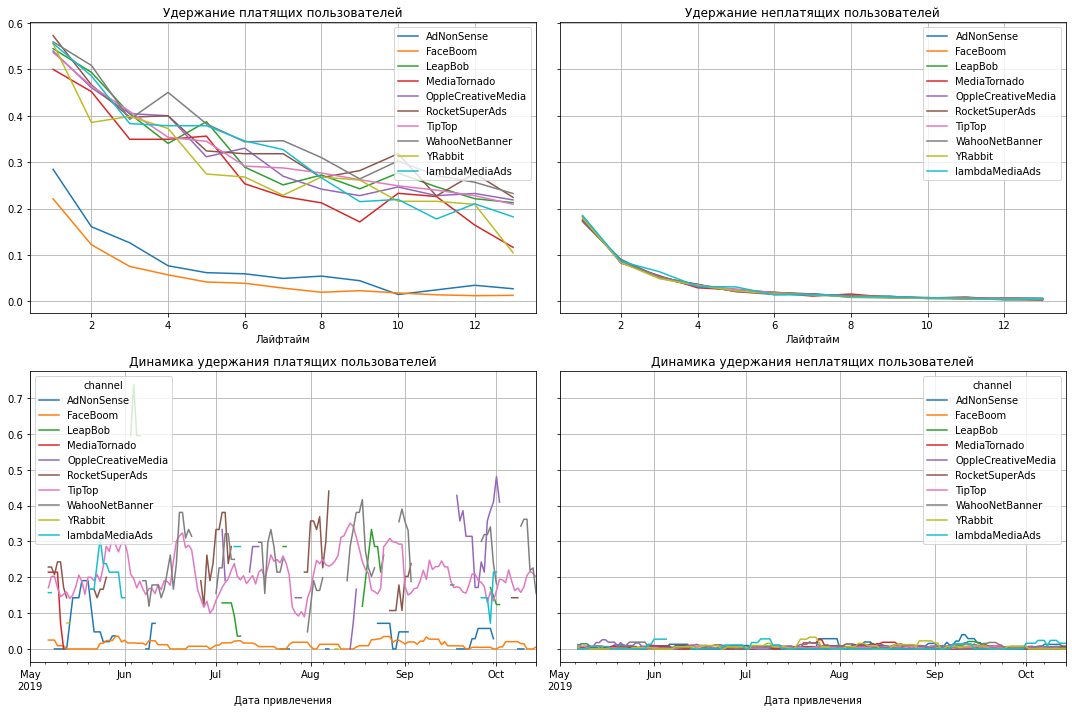

In [ ]:
# удержание с разбивкой по каналам
dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Самый низкий уровень удержания платящих пользователей в каналах AdNonSense, FaceBoom

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"> </h2>
    
✅ По конверсии и удержанию всё верно прокомментировано. Самая низкая конверсия у пользователей PC, самая высокая - Mac и iPhone. Удержание платящих чуть выше у PC.  
    
Конверсия в США существенно больше, чем в других странах. При этом по удержанию занимают последнее место.
    
По конверсии FaceBoom и AdNonSense лидируют, при этом по удержанию есть проблема "дырявого ведра", когда пользователи уходят из приложения в бóльших масштабах, чем ожидается. Новые пользователи, пришедшие из этих каналов, слабо конвертируются в постоянных клиентов. TipTop, отличающийся дорогой рекламой, по удержанию не выделяется на общем фоне.

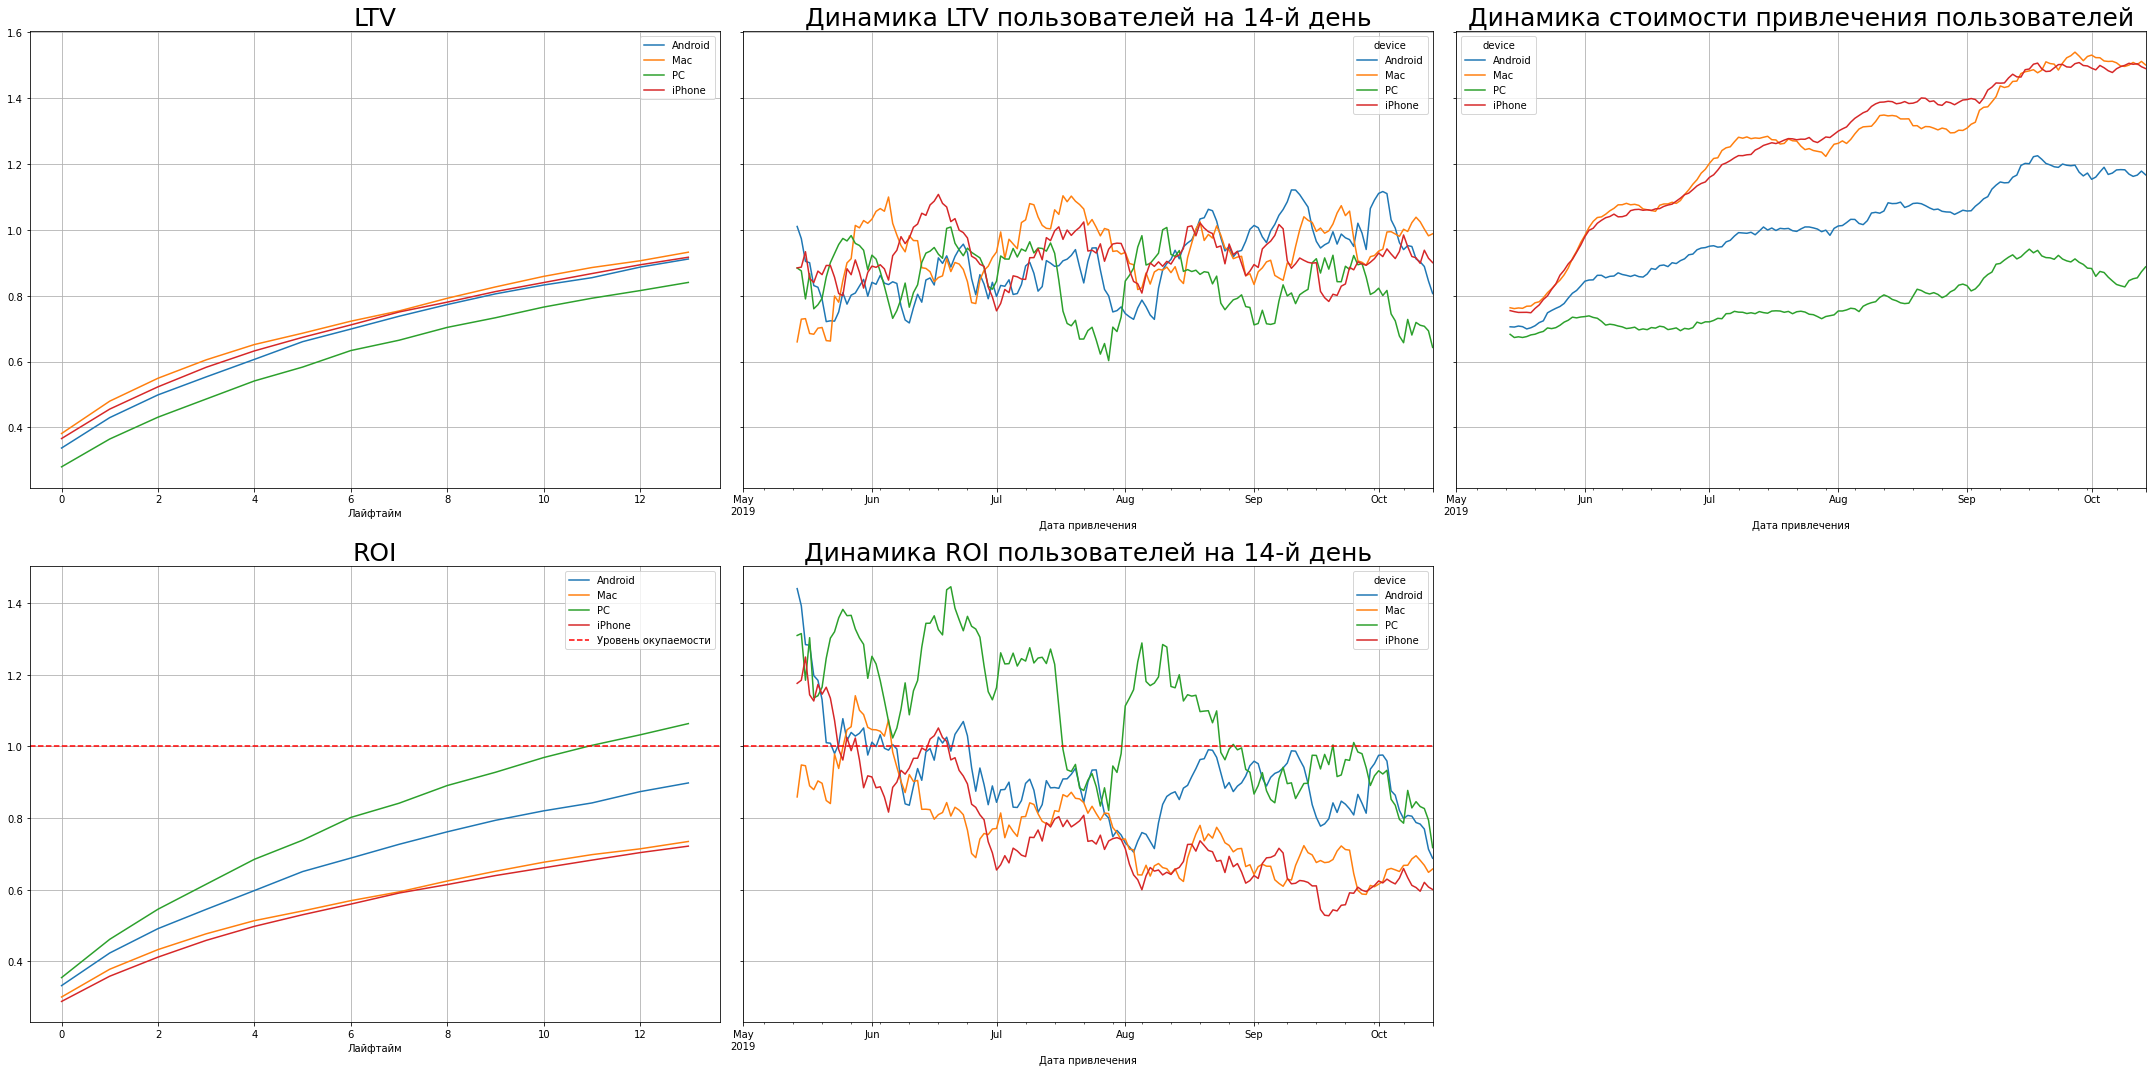

In [ ]:
# 5.3. Проанализируем окупаемость рекламы с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)



На графиках видно, что начиная с сентября пользователи на всех устройствах перестают окупаться. До сентября лучше всего себя показывали пользователи, использующие PC, затраты на них окупались. Стоимость привлечения таких пользователей самая маленькая среди всех устройств.

Дороже всего стоят пользователи, использующие MAC, iPhone.

По графику LTV можно проследить, что пользователи, пользующиеся приложением на PC потеницально потратят меньше средств чем пользователи, использующие приложение с других устройств.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
✅ Здесь мы видим, что с окупаемостью проблемы по всем устройствам, кроме PC. САС по устройствам Apple больше PC и Android. LTV у всех почти одинаковый, чуть ниже он у PC.
    
Еще желательно написать, на какой день PC окупается.
  

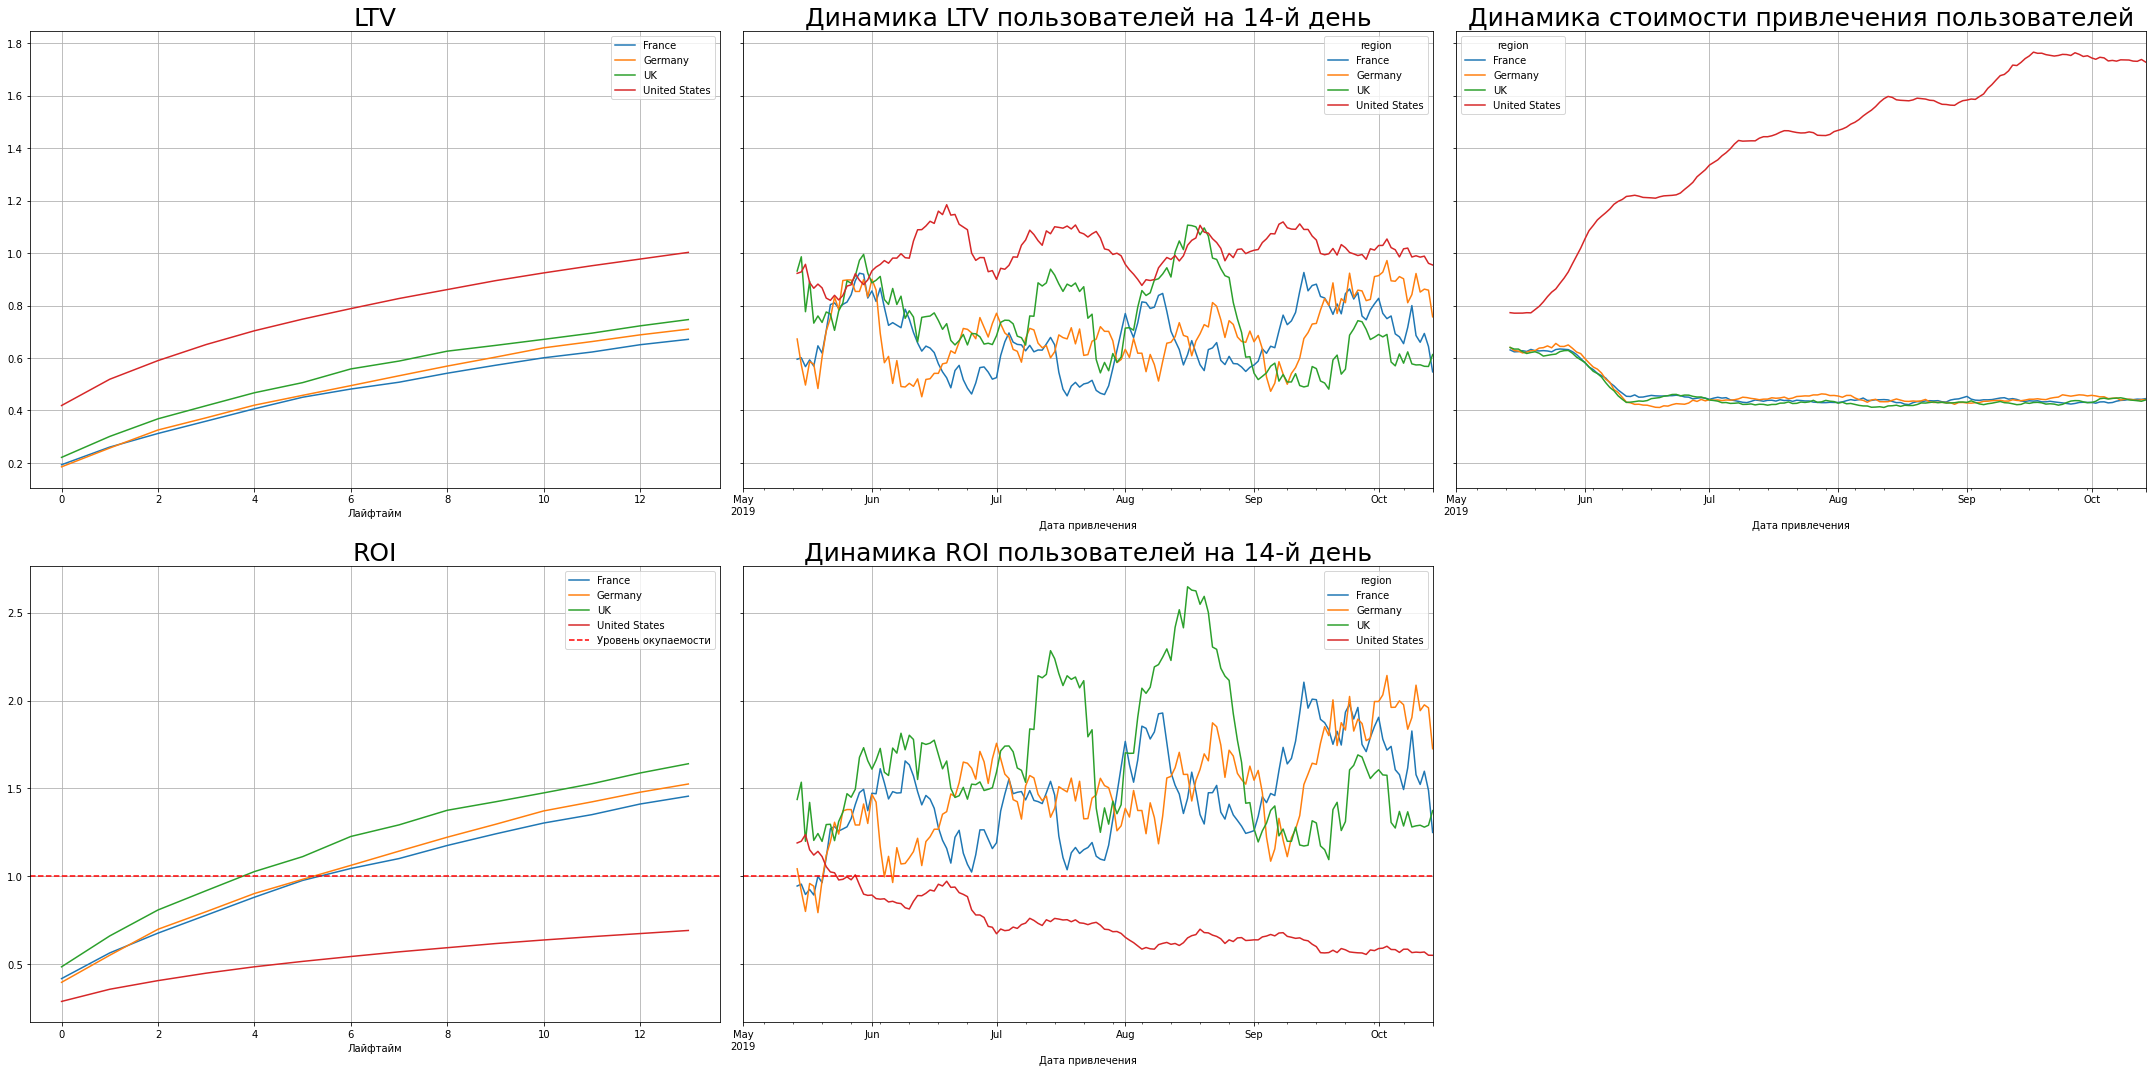

In [ ]:
# 5.4. Проанализируем окупаемость рекламы с разбивкой по странам.

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

По графикам видим, что наиболее дорогое привлечение генерит США. В этой же стране стоимость привлечения ниже уровня окупаемости. LTV в США выше, чем в других странах.

В остальных странах реклама окупается.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
✅ Хорошо, реклама не окупается только в США. И только в этой стране растет стоимость привлечения. При этом LTV - самый высокий среди представленных стран.
    
Также можно обратить внимание на всплески на графике с динамикой ROI

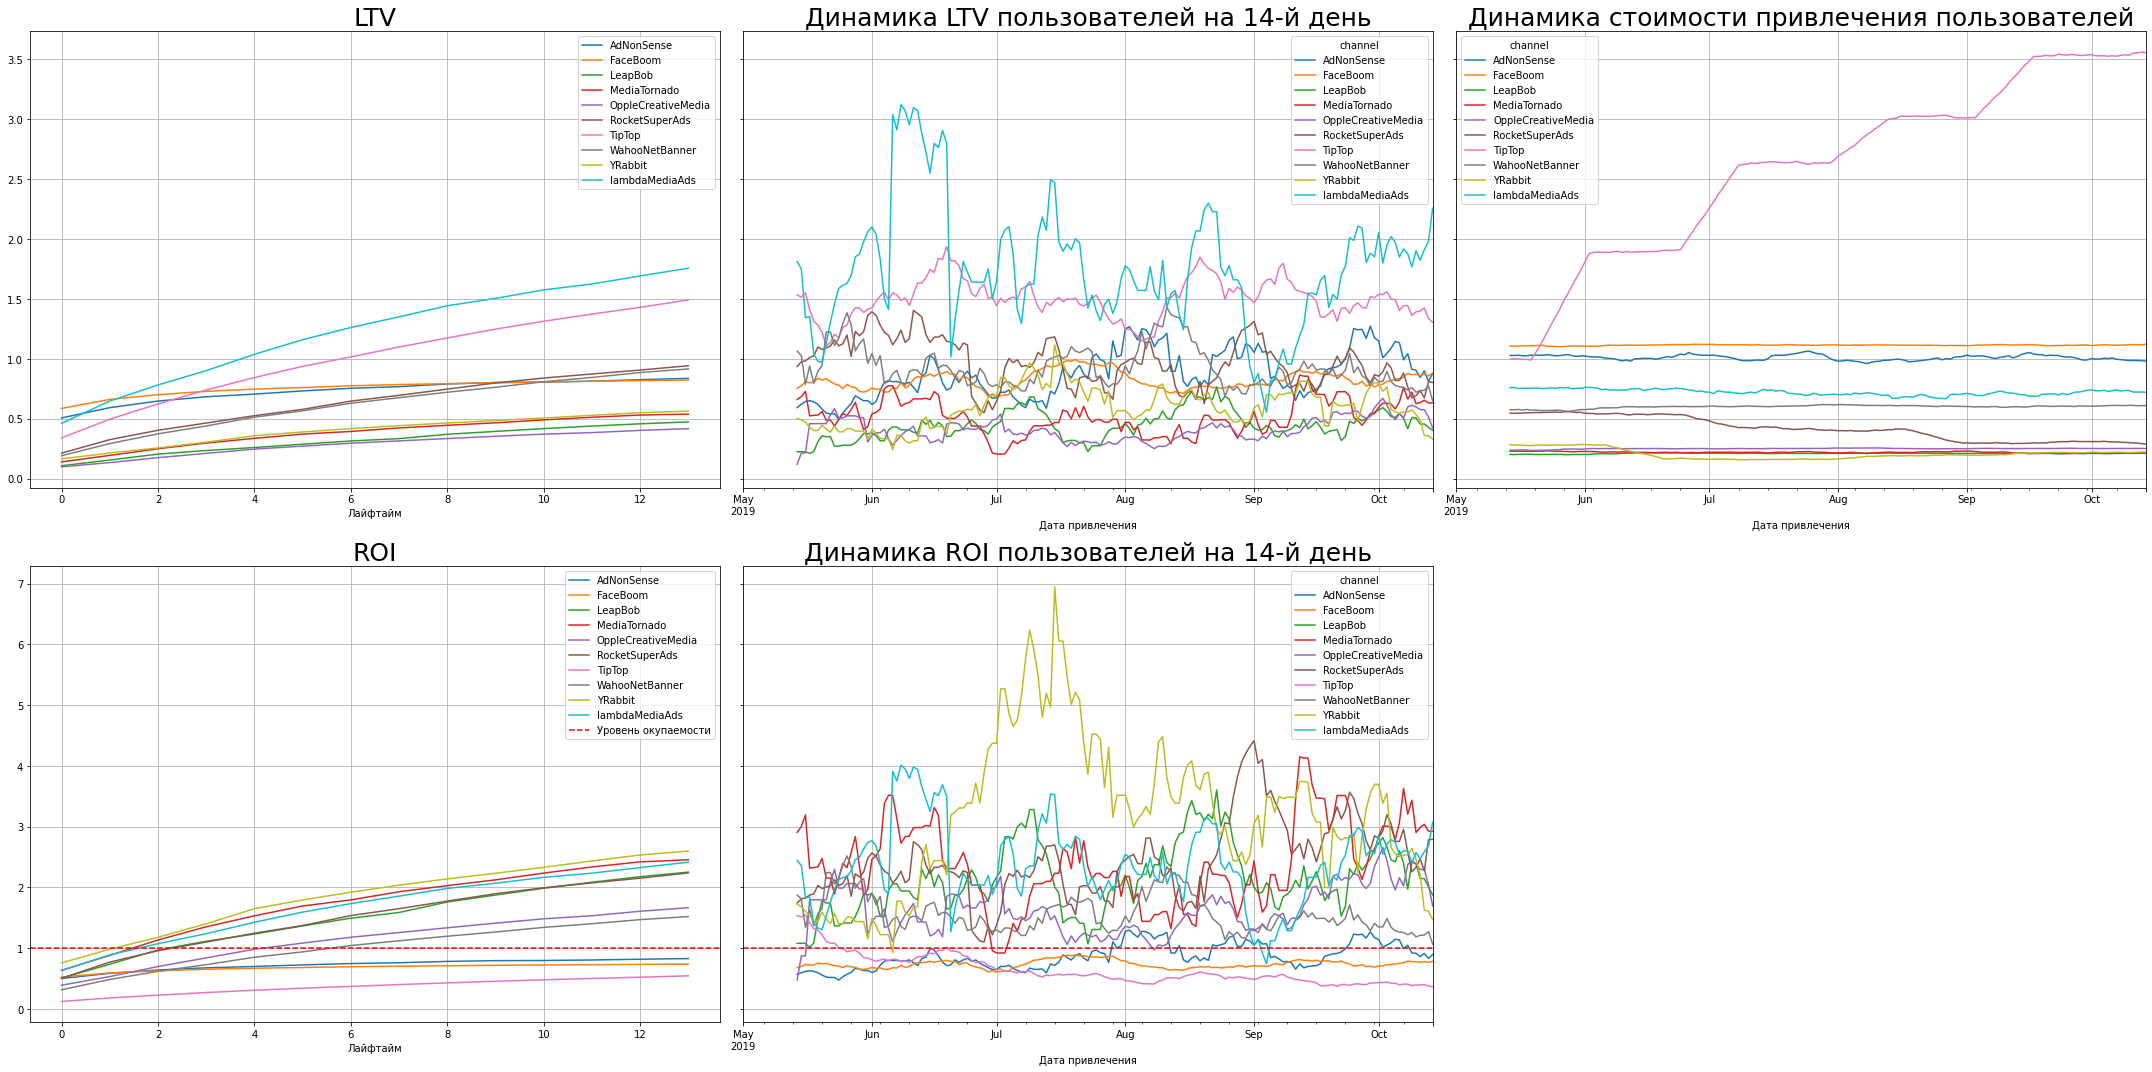

In [ ]:
# 5.5. Проанализируем окупаемость рекламы с разбивкой по рекламным каналам.

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)


- Стоимость привлечения наиболее высока в канале TipTop и с временем только растет. Но затраты себя не окупают. У остальных динамика стабильная
- Из 10 каналов 3 находятся ниже уровня окупаемости: TipTop, AdNonSense, FaceBoom
- Все остальные каналы начинают себя окупать, начиная со второй недели
- LTV в динамике растет. Выше всего LTV в канале AdNoneSense, TipTop

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"></h2>
    
❌ Стоит дополнить комментарий информацией о ROI, какие еще каналы не окупились? Также добавить про LTV. Есть ли какой-либо необычный всплеск на графике с динамикой ROI?

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Добавила выше

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"> </h2>
    
✅ Лидерами по LTV являются lambdaMediaAds и TipTop. Не окупаются три канала, включая TipTop и FaceBoom. У канала TipTop стоимость привлечения пользователей заметно больше, чем у других каналов. Дорогая реклама приносит убыток компании.

Но не хватает еще комментария по графику с динамикой ROI

 <div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
✅ Также можно провести дополнительный анализ окупаемости рекламы с разбивкой по рекламным каналам для США и отдельно для европейских стран.
    
В частности, можно ответить на вопрос, куда лучше перенаправить рекламный бюджет в США. Какой источник показывает неплохую конверсию, хороший ROI и высокое удержание платящих пользователей на американском рынке?


5.6 Ответим на вопросы:

**Окупается ли реклама, направленная на привлечение пользователей в целом?**
- С течением времени эффективность рекламы снижается, при этом затраты на привлечение пользователей увеличиваются. Реклама так и не принесла ожидаемой окупаемости.

**Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?**
- Из стран: USA, из каналов: TipTop, FaceBoom, AdNonSense, из устройств:IPhone и MAC


**Чем могут быть вызваны проблемы окупаемости?**
- Низкая окупаемость связана с неправильным распределением бюджета между каналами привлечения(возможно от некторых лучше отказаться в пользу более эффективных каналов)

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

Основная причина убытков компании: реклама в привлечение пользователей не окупилась

**Причины неэффективности привлечения пользователей:**
- неправильное распределение бюджета между каналами привлечения. 3 канала привлечения не окупают себя: AdNonSense, FaceBoom, TipTop
- в США затраты на рекламу не окупают себя, удержание платящих пользователей ниже уровня остальных стран
- пользователи Mac и IPhone стоят дороже остальных устройств, но не окупают себя
- низкий уровень удержания платящих пользователей в каналах AdNonSense,FaceBoom

**Рекомендации для отдела маркетинга:**   
- поиск новых каналов привлечения
- отказ от неокупаемых каналов привлечения
- расширения географии пользователей приложения
- изучение проблем приложения на Mac, IPhone и оптимизация расходов приложения на этих устройствах
- расширение числа пользователей на PC и Android
- обратить внимание на 4 недооценённых канала: Yrabbit, MediaTornado, lambdaMediaAds, RocketSuperAds. В указанных каналах низкая стоимость привлечения, наивысший уровень ROI. + в рейтинге конверсий по каналам лидируют: lambdaMediaAds.



<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"></h2>
    
❌ Вывод нужно будет дополнить после анализа конверсии и удержания. В частности, какое удержание у FaceBoom? Также следует добавить, почему стоит вкладываться в указанные недооцененные каналы, какая у них конверсия, удержание, LTV и CAC. Что можно сказать про RocketSuperAds, какие у него результаты?

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Добавила

<div style="border:solid lightblue 3px; background:#f7faf8; padding: 20px">
<span style="color:darkblue">Общий вывод по проекту v_1:</span>
    
У тебя хорошая работа! Проделана бóльшая часть проекта. Соблюдена структура, выполнено большинство ключевых этапов. Но есть замечания, которые необходимо доработать:
* определить минимальную и максимальную даты привлечения пользователей
* построить визуализацию динамики изменения расходов во времени по месяцам
* дополнить выводы в разделе "Оцените окупаемость рекламы"
* проанализировать конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам
* обновить и дополнить итоговый вывод
   
Также добавил рекомендации по улучшению проекта. Жду проект)

<div style="border:solid lightblue 3px; background:#f7faf8; padding: 20px">
<span style="color:darkblue">Общий вывод по проекту v_2:</span>

Спасибо за доработанные замечания! Проект принят.
    
Дополнительно можно почитать о метриках продукта и метриках роста по [ссылке](https://gopractice.ru/product/cohort_analysis/)
    
В [этой](https://smysl.io/blog/pandas-cohorts/) статье разбирается код для построения когорт.
    
Успехов в дальнейшем обучении!)